<h1>
<center>CFRM 421/521, Spring 2022</center>
</h1>

<h1>
<center>Wendy Jiang</center>
</h1>

<h1>
<center>Homework 3</center>
</h1>

* **Due: Monday, May 16, 2022, 11:59 PM**


* Total marks: 37


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as one Jupyter notebook on Canvas and one PDF file on Gradescope.** The notebook must be already run, that is, make sure that you have run all your code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. Applying PCA [6 marks]

## (a) [4 marks]
Train a SVM classifier with a Gaussian RBF kernel on the MNIST training data (the first 60,000 observations). Use the default arguments for the classifier. Take the first 10,000 observations as the training set given by `X_train_red` and `y_train_red` in the code below. Time your training using `%time` and report the accuracy of the trained model on the test set (the last 10,000 observations of MNIST). Now, use PCA on the original training set (60,0000 observations) to find principal components with an explained variance ratio of 60%. Retrain the SVM classifier using these principal components instead of the original features. Time the training and accuracy on the test set. Comment on whether PCA helped or not. Do not shuffle the data and do not use a standard scaler.

In [41]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X_train = mnist["data"][:60000]
X_test  = mnist["data"][60000:]
y_train = mnist["target"][:60000]
y_test  = mnist["target"][60000:]
X_train_red = mnist["data"][:10000]
y_train_red = mnist["target"][:10000]

**[Add your solution here]**

In [42]:
from sklearn.svm import SVC

rbf_kernel_clf = SVC(kernel="rbf", max_iter=50000)
%time rbf_kernel_clf.fit(X_train_red, y_train_red)

CPU times: user 18.6 s, sys: 163 ms, total: 18.7 s
Wall time: 19.1 s


SVC(max_iter=50000)

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rbf_kernel_clf.predict(X_test))

0.9594

The accuracy on the test set is 0.9594.

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.6)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

17

In [46]:
# Here is the principal components with an explained variance ratio of 60% 
X60 = pca.transform(X_train)
X60[:3]

array([[ 123.93258866, -312.67426202,  -24.51405176, -555.75795794,
         -27.29666823, -232.47628435,  233.99573343,  159.79949383,
        -363.51502076,  198.42807734,  197.49702518, -254.05591279,
        -113.49640869,  749.30245114,  219.25955388,   -4.69324059,
         330.15199166],
       [1011.71837587, -294.85703827,  596.33956104, -460.76619688,
        -827.27522188, -181.9505276 ,  -45.02047773, -104.96959154,
          40.45911807,  150.9688987 , -286.49285746, -107.33265201,
        -319.19111083,   90.90517506, -237.87473848, -161.93474408,
         -54.04305019],
       [ -51.84960805,  392.17315286, -188.50974943,  521.01134731,
        -306.68072885,   -1.83534553, -859.04719913,  368.59187537,
        -114.54607366, -178.50814363,  450.54477369, -158.88586328,
         186.98313525,  109.19120529, -144.8112421 , -191.28843123,
         169.59680469]])

After using the PCA on the original training set, we have 17 principal components with an explained variance ratio of 60%.

In [47]:
X_recovered = pca.inverse_transform(X_reduced)

In [48]:
%time rbf_kernel_clf.fit(X_recovered, y_train)

CPU times: user 4min 47s, sys: 781 ms, total: 4min 48s
Wall time: 4min 48s


SVC(max_iter=50000)

In [50]:
accuracy_score(y_test, rbf_kernel_clf.predict(X_test))

0.9128

The accuracy on the test set of the SVM classifier using these principal components is 0.9128. The PCA helped to save time and not reduce accuracy too much.

## (b) [2 marks]

Repeat (a) using a random forest classifier instead of the SVM classifier and comment on the result. Use `random_state=42` in the classifier and use the default for the other arguments. You are allowed to use `n_jobs=-1`.

**[Add your solution here]**

In [51]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
%time rnd_clf.fit(X_train_red,y_train_red)

CPU times: user 5.58 s, sys: 238 ms, total: 5.81 s
Wall time: 1.23 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [52]:
accuracy_score(y_test, rnd_clf.predict(X_test))

0.9504

The accuracy of random forest classifier is 0.9504.

In [53]:
rnd_clf_pca = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [55]:
%time rnd_clf_pca.fit(X_recovered, y_train)

CPU times: user 5min 1s, sys: 1.14 s, total: 5min 3s
Wall time: 45.5 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [56]:
accuracy_score(y_test, rnd_clf_pca.predict(X_test))

0.79

The accuracy is 0.79, it is much lower after using PCA. Then the PCA is not helped at all.

# 2. Visualizing dimensionality reduction [8 marks]

## (a) [3 marks]
Load the MNIST dataset and take only the first 10,000 observations as `X` and `y`. Use the nonlinear dimensionality reduction technique **t-SNE** to reduce this subset of the MNIST dataset down to 2 dimensions. Include the argument `random_state=42`. Measure how long it took to reduce the dimensionality, this will be used in (b) below. Plot a scatterplot of the outcome of t-SNE. Use 10 different colors to represent each image's target class and plot scaled-down versions of the digit images themselves. The visualization will be too cluttered if you draw the image for every observation, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance. You should get a nice visualization of different classes and some of the digit images in them. Use the plot to comment on which classes are easily identified and which ones can be hard to distinguish.

Hint: It is helpful to read page 233 of the textbook for information about t-SNE, and see the solution of Chapter 8, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/08_dimensionality_reduction.ipynb) on the textbook website to see how to implement t-SNE and produce these plots using the `plot_digits()` function.

**[Add your solution here]**

In [57]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X = mnist["data"][:10000]
y = mnist["target"][:10000]

In [58]:
from sklearn.manifold import TSNE

%time X_tsne = TSNE(n_components=2,random_state=42).fit_transform(X)

CPU times: user 5min 20s, sys: 24.6 s, total: 5min 45s
Wall time: 2min 15s


In [31]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)


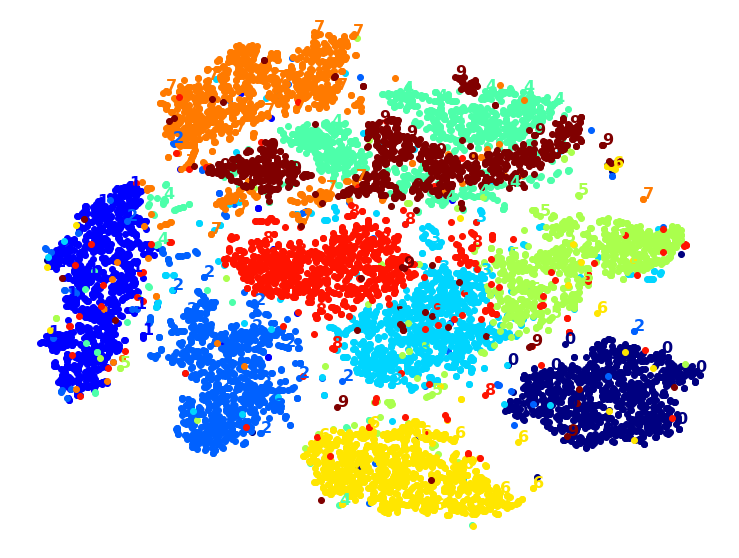

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plot_digits(X_tsne, y)

## (b) [5 marks]
Try using other dimensionality reduction methods. Specifically, try:

* Regular PCA to reduce to 2 dimensions.
* LLE to reduce to 2 dimensions.
* First apply PCA with an explained variance ratio of 95%, then apply t-SNE to reduce to 2 dimensions.

For each algorithm, include the argument `random_state=42`. Then for each of the three methods above, report how long it took to reduce the dimension. Also, provide a 2D plot of the results. Which method runs faster? Which one results in a better visualization? Include t-SNE from (a) as part of your comparison.

**[Add your solution here]**

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
%time pca.fit_transform(X)

CPU times: user 698 ms, sys: 129 ms, total: 827 ms
Wall time: 155 ms


array([[ 108.23211546, -336.92331647],
       [1026.5483626 , -381.92708911],
       [ -41.72946331,  405.23600888],
       ...,
       [-485.47725194, -337.32517024],
       [-364.62378594,  475.52492354],
       [-337.37151137,  591.88882104]])

In [71]:
def original_recovered_pca(X_train, n_components):
    pca = PCA(n_components = n_components)
    X_reduced = pca.fit_transform(X_train)
    X_recovered = pca.inverse_transform(X_reduced)
    plt.figure(figsize=(7, 4))
    plt.subplot(121)
    plot_digits(X_train[::2100])
    plt.title("Original", fontsize=16)
    plt.subplot(122)
    plot_digits(X_recovered[::2100])
    plt.title("Compressed", fontsize=16)
    plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 10000

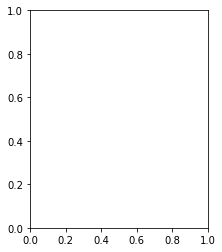

<Figure size 936x720 with 0 Axes>

In [72]:
original_recovered_pca(X,2)

In [37]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time lle.fit_transform(X)

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 6.2 µs


In [ ]:
from sklearn.manifold import TSNE

pca_ratio = PCA(n_components=0.95, random_state=42)
X_new = pca_ratio.fit_transform(X)
%time TSNE(n_components=2, random_state=42).fit_transform(X_new)

# 3. k-Means clustering [11 marks]

Hint: It is helpful to read the solution of Chapter 9, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb).

## (a) Chapter 9, Question 10 [6 marks]


The classic Olivetti faces dataset contains 400 grayscale $64\times 64$ pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), and the task is to train a model that can predict which person is represented in each picture. Load the dataset and split it into a training set and a validation set using the code below. Since the dataset is quite small, stratified sampling is used to ensure that there are the same number of images per person in each set. There is no need to create a test set.

In [73]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_olivetti_faces()
# Creating validation set
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=120, random_state=42)
train_idx, val_idx = next(strat_split.split(data.data, data.target))
X_valid, y_valid = data.data[val_idx], data.target[val_idx]
# Creating training set
X_train, y_train = data.data[train_idx], data.target[train_idx]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/wenqijiang/scikit_learn_data


Note that the dataset is already scaled between 0 and 1, so there is no need to use a standard scaler. Next, use PCA on the features with an explained variance ratio of 99%. Then cluster the images based on the reduced features using k-Means, where the argument `random_state=42` is included. To determine the number of clusters $k\in\{5,10,15,\dots,145\}$, (i) plot inertia, (ii) plot silhouette scores. Choose the number of clusters $k'$ based on (ii). Then (iii) plot silhouette diagrams where the number of clusters is 40 and $k'$, and explain which number of clusters is better. Finally, suppose we use $k'$ clusters, (iv) visualize the clusters by plotting the images in each cluster and comment on whether you see similar faces in each cluster.

**[Add your solution here]**

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
#X_valid_pca = pca.fit_transform(X_valid)

In [79]:
from sklearn.cluster import KMeans
k_range = range(5,150,5)

kmc_per_k = []
for k in k_range:
    kmc = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmc_per_k.append(kmc)

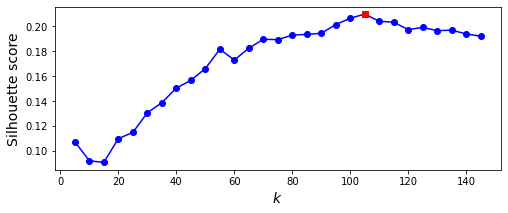

In [83]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmc_per_k]
best_ind = np.argmax(silhouette_scores)
best_k = k_range[best_ind]
best_score = silhouette_scores[best_ind]

plt.figure(figsize=(8, 3))
plt.plot(range(5,150,5), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

## (b) Chapter 9, Question 11  [5 marks]

Continue to use the reduced features based on PCA in (a). Train a random forest classifier `RandomForestClassifier(n_estimators=150, random_state=42)` to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-Means as a dimensionality reduction tool, and train a classifier. Search for the number of clusters $k\in\{5,10,15,\dots,145\}$ that allows the classifier to get the best performance on the validation set. What performance can you reach on the validation set? What if you append the features from the reduced set to the original features and again search for the best number of clusters?

**[Add your solution here]**

In [ ]:
RandomForestClassifier(n_estimators=150, random_state=42)

# 4. Finding regimes in time series [12 marks]

## (a) [6 marks]
Obtain the daily values of the CPI and unemployment rate from FRED up to 2021-06-01 and then convert the CPI into the yearly inflation rate `inf_data` using the following code. Note that you may have to install the package `pandas_datareader`. Alternatively, you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/91707964/download?download_frd=1).

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

unemp_data = pdr.get_data_fred('UNRATE', datetime(1945,1,1),datetime(2021,6,1))
cpi_data = pdr.get_data_fred('CPIAUCSL', datetime(1945,1,1),datetime(2021,6,1))
inf_data = (cpi_data/cpi_data.shift(12)-1).iloc[12:]
data = pd.concat([inf_data, unemp_data],axis=1)

Split the data into a training set (before Jan 2005, using `data[:"2005-1-1"]` for instance) and a test set (Jan 2005 and after). Now, ignore the time aspect of your training set by treating it as a 2-dimensional dataset. Use k-means to divide your training set into a number of clusters called **regimes**. To find the number of regimes (clusters) $k\in\{2,3,\dots,10\}$: (i) plot inertia, (ii) plot silhouette scores, (iii) plot silhouette diagrams for $k\in\{2,3,\dots,10\}$. How many regimes do you choose? Explain your answer. Recall that you should use a standard scaler before applying k-means.

**[Add your solution here]**

## (b) [3 marks]

Report the centroid of the regimes in (a). For the training set, plot the inflation rate (x-axis) vs unemployment rate (y-axis) after these features have been standardized, and show the regimes and centroids in the plot. Also plot time series of the inflation rate and unemployment rate (the original series before standardization), and show the regimes on the plot. The regimes can be shown using time series (line graphs) of the centroid for each of two series for instance.

**[Add your solution here]**

## (c) [3 marks]

A regime-switching model is a probabilistic model that governs how regime transitions take place. A very simple regime-switching model is a Markov chain. Here, we assume that the next month's regime depends on the current regime. In other words, all we need to know are the **transition probabilities** $p_{i,j} = \mathbb{P}(X_{t+1}=j|X_t=i)$, where $X_t$ is the regime at day $t$. Using the time series of regimes in the training set that you found in (b), estimate these transition probabilities, as follows:
\begin{align*}
    p_{i,j} = \frac{\mathbb{P}(X_{t+1}=j \text{ and } X_t=i)}{\mathbb{P}(X_t=i)}\approx \frac{\text{number of transition from regime $i$ to $j$}}{\text{number of transition from regime $i$}}
\end{align*}
Next, let us check how good your regime switching model is. Calculate the transition probabilities using the test set. Do not retrain your k-means clusterer, simply use it to predict the regimes of the test set. Then, repeat the estimation of the transition probabilities on the test set.

Note: Depending on your choice of $k$, it is possible that some $p_{i,j}$ cannot be estimated due to  having no transitions from regime $i$.

**[Add your solution here]**

# 5. Optional exercise: Neural Networks

There is nothing to submit for this exercise. However, it is strongly recommended that you spend time going through this exercise.

Visit the TensorFlow Playground at [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

## (a)
**Layers and patterns:** Try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers, the more complex the patterns can be.

## (b)
**Activation function:** Try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

Try, also, the sigmoid (i.e. the logistic) activation function. Note that it will take significantly more time for the ANN to properly classify the dataset (you should wait until around 900 epochs).

## (c)

**Local minima:** Modify the network architecture to have just one hidden layer with three neurons and the ReLU activation function. Train it multiple times. Between each training, press the reset button next to the play button on the top left. Notice that the training time and the shape of the decision borders varies a lot. If you are patient enough, you will notice that sometimes the network gets stuck in a local minimum which does not properly separate the classes (this happens at random).

## (d)

**Not enough neurons:** Next, remove one neuron so that you have only one hidden layer with 2 neurons. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

## (e)
**Enough neurons:** Next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck at local optima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

## (f)

**DNNs and vanishing gradients:** Now change the dataset to be the spiral (bottom right dataset under “DATA”). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the “vanishing gradients” problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.